# 📊 **EPL Visualisations: English Premier League (EPL) — Exploratory Data Analysis**
- This notebook provides an exploratory data analysis (EDA) of English Premier League (EPL) match data. It focuses on key aspects of team and match performance using visual insights.

# Objectives

- **Understand Performance Trends:** Analyze match outcomes, goal patterns, and seasonal fluctuations to assess team strengths and weaknesses.
- **Evaluate Home vs Away Impact:** Quantify home-field advantage through goal and win distributions.
- **Identify Top Performers:** Rank teams by goals scored, points per match, and consistency over the season.
- **Assess Playing Styles:** Use clustering to categorize teams into high-scoring, defensive, and balanced profiles.
- **Compare xG vs Actual Goals:** Detect overperforming or underperforming teams to support tactical and scouting decisions.
- **Provide Actionable Insights:** Present findings in a way that supports coaches, analysts, and fans in understanding the league’s competitive landscape.

# Inputs

- **Dataset Source:** Cleaned EPL match dataset (CSV format) containing match-level statistics.
- **Key Variables:**
  - `MatchDate` — Date of the match
  - `HomeTeam` — Home team name
  - `AwayTeam` — Away team name
  - `FullTimeHomeGoals` — Goals scored by the home team
  - `FullTimeAwayGoals` — Goals scored by the away team
  - `FullTimeResult` — Result code (H = Home Win, A = Away Win, D = Draw)
- **Derived Features:**
  - `Total_Goals` — Sum of home and away goals per match
  - `Month` — Month extracted from match date
  - Synthetic `Home_xG` & `Away_xG` — Simulated expected goals for demonstration purposes
- **Libraries Used:** Pandas, NumPy, Matplotlib, Seaborn, Plotly, Scikit-learn

# Outputs

- **Bar Chart:** Total goals scored by home teams vs away teams — illustrates home advantage in scoring.  
- **Histogram:** Distribution of total goals per match — highlights scoring patterns and typical match outcomes.  
- **Pie Chart:** Match result distribution (home wins, away wins, draws) — reveals league competitiveness and outcome balance.  
- **Line Plot:** Monthly average goals per match — uncovers seasonal trends affecting scoring rates.  
- **Bar Chart:** Top 10 highest scoring teams — identifies the most prolific attacking teams across home and away games.  
- **Heatmap:** Goal difference by team (home goals minus away goals conceded) — visualizes team dominance in home vs away contexts.  
- **Interactive Bar Chart:** Average points earned per match by each team — ranks teams by consistent performance.  
- **Line Plot:** Cumulative points over time for a selected team — tracks performance momentum through the season.  
- **Scatter Plot:** Synthetic expected goals (xG) vs actual goals for home matches — compares team efficiency and finishing.  
- **Boxplot:** Goals scored by match result type — examines goal distributions for wins, draws, and losses.  
- **Cluster Plot:** Team grouping based on average home and away goals — reveals distinct playing styles and tactical profiles.

# Additional Comments

- **Data Limitations:** The dataset may not include the latest seasons or detailed player-level data. Synthetic xG values are for demonstration and not official metrics, so interpret with caution.  
- **Analysis Scope:** Focused on team-level trends and aggregate stats; more granular tactical analysis would require player tracking and possession data.  
- **Potential Extensions:** Could add predictive modeling, use official xG data, or analyze form over multiple seasons for deeper insights.  
- **Interactive Elements:** Enhancing with interactive dashboards (e.g., Plotly Dash, Streamlit) would allow dynamic filtering and better user engagement.  
- **Practical Applications:** Useful for coaching, scouting, and fan insights by highlighting performance patterns and team styles.  
- **Reproducibility:** Code is designed for clarity and repeatability; ensure dataset versions match for consistent results.


**How to run:**
- Open this file in JupyterLab or VS Code and run cells top-to-bottom.  
- Make sure `../data/epl_cleaned.csv` is present, or change the path in the `DATA_PATH` variable.

**What the notebook covers:**
- Data loading and validation
- Home vs away goal analysis
- Match-level distributions and monthly trends
- Team-level aggregates (top scorers, goal differences)
- Cumulative points timeline for a chosen team
- Points-per-match metrics
- Synthetic xG exploration (clearly labeled as simulated)
- Clustering analysis of team scoring profiles

# Section 1: Check Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

- We import common libraries used for EDA and visualization. 
- Plotly is included for interactive plots 
- while Matplotlib/Seaborn provide static, reproducible visuals suitable for presentations.
- KMeans and StandardScale are used for a lightweight clustering
- If you want to install any missing packages, run in a terminal: use 'pip install'

# Section 2: Load the CSV into a DataFrame and show a quick preview.
-  a few basic data quality checks and create some derived columns we will
- use through the notebook (Total_Goals, MatchDate parsed, Month, etc.).

In [2]:
# Load your cleaned EPL dataset
df = pd.read_csv("../data/epl_cleaned.csv")

- Preview the Data set with further rows
- Now this is going to check the first 50 rows and with the updated now 25 Columns to get a good look of the bulk of the data

In [3]:
# Display the first 50 rows of the DataFrame
df.head(50)

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Result,Goal_Diff,Total_Goals
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,6,13,12,1,2,0,0,Home Win,4,4
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,7,19,14,1,2,0,0,Home Win,2,6
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,4,15,21,5,3,1,0,Away Win,-2,4
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,8,11,13,1,1,0,0,Draw,0,4
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,4,21,20,1,3,0,0,Home Win,2,2
5,2000/01,2000-08-19,Leicester,Aston Villa,0,0,D,0,0,D,...,4,12,12,2,3,0,0,Draw,0,0
6,2000/01,2000-08-19,Liverpool,Bradford,1,0,H,0,0,D,...,1,8,8,1,1,0,0,Home Win,1,1
7,2000/01,2000-08-19,Sunderland,Arsenal,1,0,H,0,0,D,...,9,10,21,3,1,0,1,Home Win,1,1
8,2000/01,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,...,4,14,13,0,0,0,0,Home Win,2,4
9,2000/01,2000-08-20,Man United,Newcastle,2,0,H,1,0,H,...,1,7,13,0,1,0,0,Home Win,2,2


---

# Section 3: Total Home vs Away Goals
- We'll start with a high-level comparison of total goals scored by home teams and away teams across the dataset. This helps check for a classic home advantage.

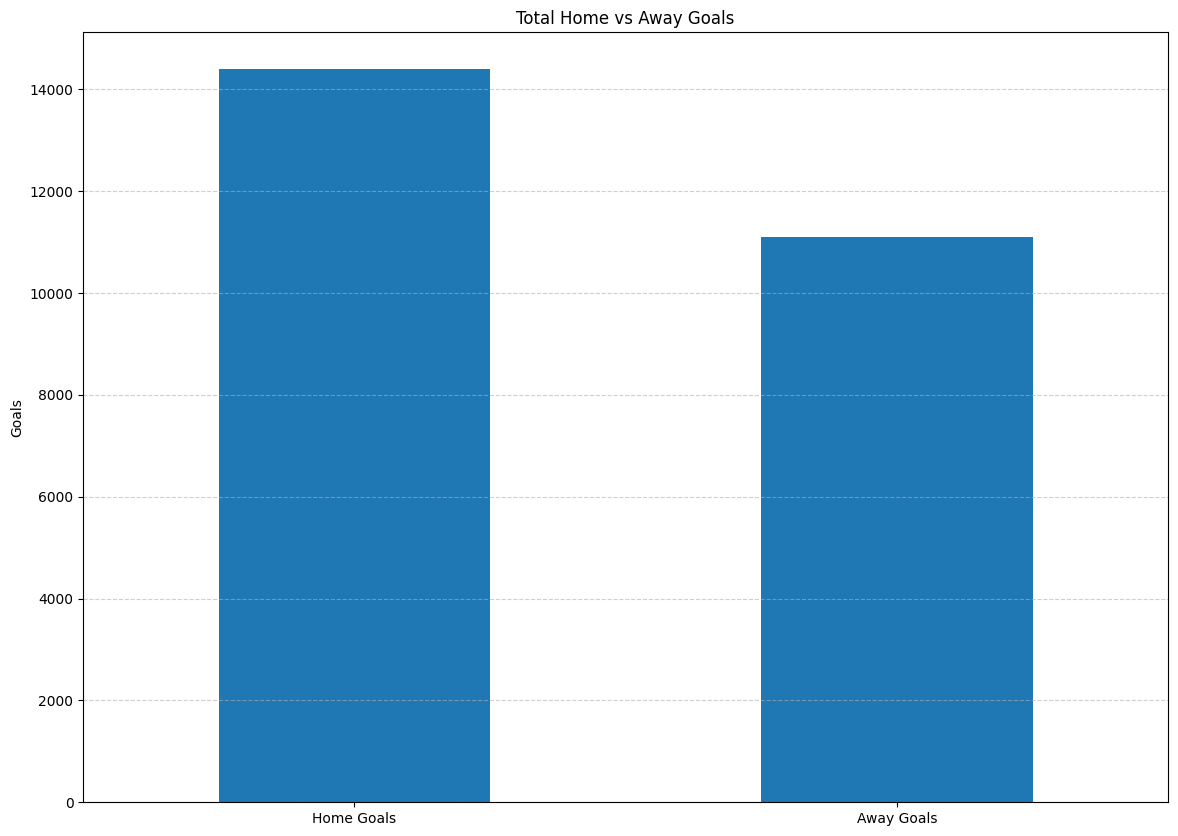

In [4]:
# 1. Total Home vs Away Goals
plt.figure(figsize=(14, 10))
df[['FullTimeHomeGoals', 'FullTimeAwayGoals']].sum().plot(kind='bar')
plt.title('Total Home vs Away Goals')
plt.ylabel('Goals')
plt.xticks(ticks=[0, 1], labels=['Home Goals', 'Away Goals'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

**Insights: Home vs Away Goals**
- This bar chart compares the total number of goals scored by home teams versus away teams. It helps assess whether playing at home provides a scoring advantage — a common trend in football due to crowd support and familiar conditions.
- This chart shows the aggregate goals by home and away teams. Historically, the Premier League shows a modest home advantage: home goals > away goals.

---

# Section 4: Distribution of Total Goals per Match
- We'll inspect how many goals matches typically have (e.g., 0,1,2,3,4+). This helps understand match frequency and variance.

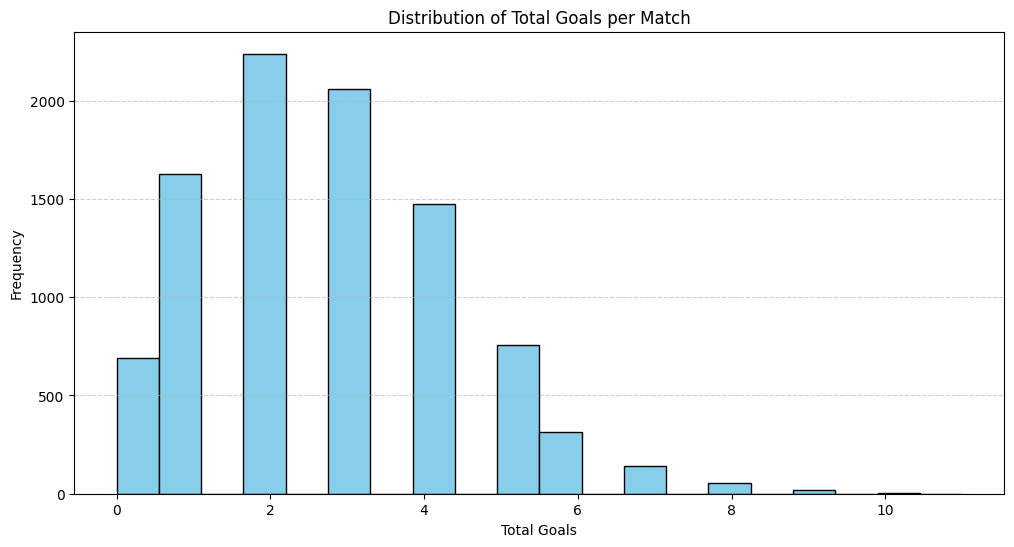

In [5]:
# 2. Histogram of Total Goals per Match
plt.figure(figsize=(12, 6))
df['Total_Goals'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)

**Insights: Goals per Match Distribution**
- Most matches tend to cluster around 1-3 goals. 
- A heavy right tail indicates occasional high-scoring games.

---

# Section 5: Cumulative Points over time
- Now that the total goals, home wins and away wins have been determined.
- Using the data in the columns to now create a cumulative points system
- We provide a function to compute cumulative points for any chosen team. This is great for slides where you track form across a season.

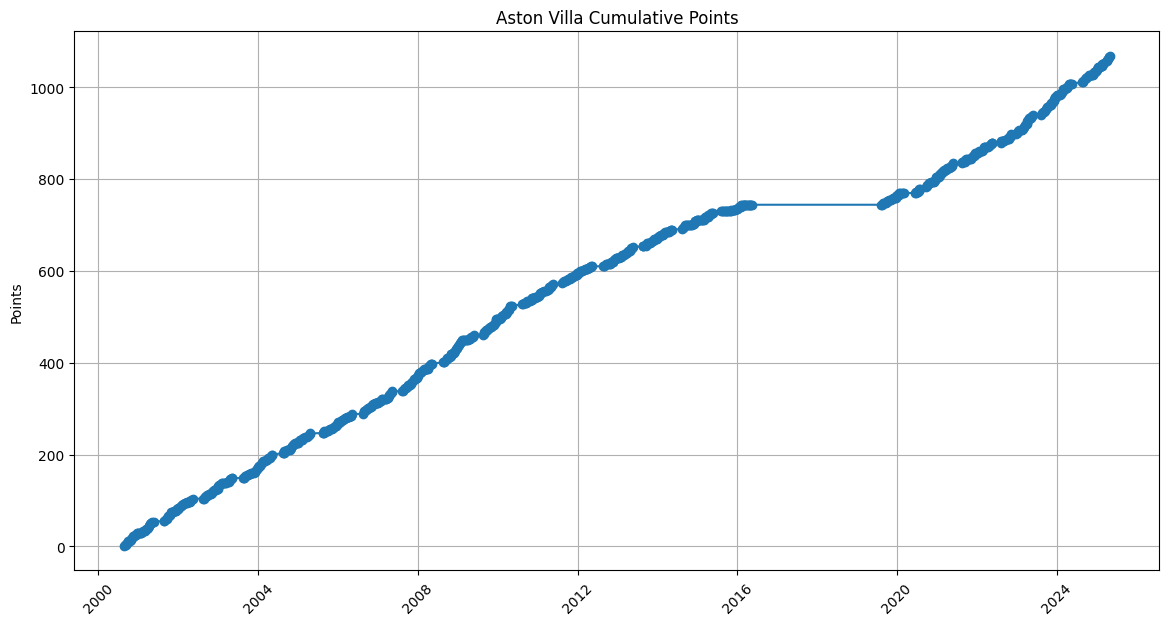

In [6]:
# 3. Cumulative Points Over Time (Aston Villa)
team = "Aston Villa"
team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].copy()
team_df['MatchDate'] = pd.to_datetime(team_df['MatchDate'])

def get_points(row, team):
    if row['HomeTeam'] == team:
        if row['FullTimeResult'] == 'H': return 3
        if row['FullTimeResult'] == 'D': return 1
    elif row['AwayTeam'] == team:
        if row['FullTimeResult'] == 'A': return 3
        if row['FullTimeResult'] == 'D': return 1
    return 0

team_df['Points'] = team_df.apply(lambda row: get_points(row, team), axis=1)
team_df.sort_values('MatchDate', inplace=True)
team_df['CumulativePoints'] = team_df['Points'].cumsum()

plt.figure(figsize=(14, 7))
plt.plot(team_df['MatchDate'], team_df['CumulativePoints'], marker='o')
plt.title(f'{team} Cumulative Points')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.grid(True)

**Insights: Cumulative Points**
- This visualization shows momentum and streaks based on Aston Villa.
- Sudden slopes indicate winning streaks; long flat sections indicate poor runs. 
- For presentations, add vertical lines for managerial changes or notable events to contextualize changes.

---

# Section 6: Top 10 Scoring Teams

- We'll compute total goals per team (home + away) and show the top 10 scorers. 
- This gives a quick view of the attacking power across teams in the dataset.

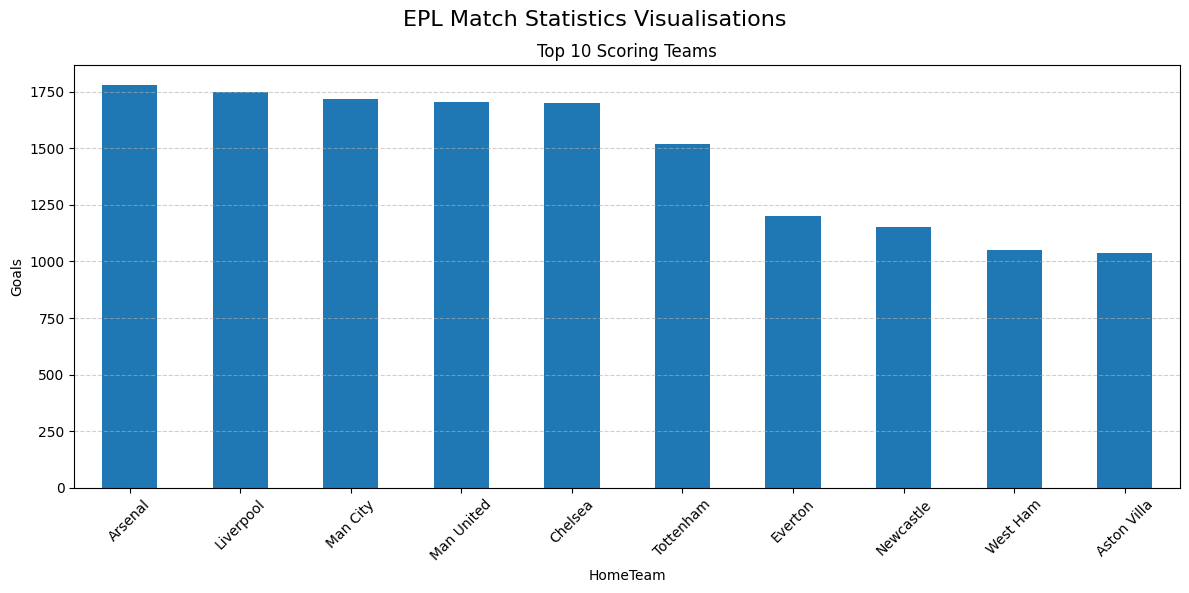

In [7]:
# 4. Top 10 Scoring Teams
home_goals = df.groupby('HomeTeam')['FullTimeHomeGoals'].sum()
away_goals = df.groupby('AwayTeam')['FullTimeAwayGoals'].sum()
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
total_goals.plot(kind='bar')
plt.title('Top 10 Scoring Teams')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("EPL Match Statistics Visualisations", fontsize=16)
plt.show()

**Insights: Top Scoring teams**
- The top scoring teams are typically among the most successful offensively.
- However, total goals do not account for defensive strength — pair this with goal difference or expected metrics for a fuller picture.

---

# Section 7: Match statistics and Team performance analysis

In [8]:
# Ensure correct datetime format
df['MatchDate'] = pd.to_datetime(df['MatchDate'])

- This converts the MatchDate column to an actual datetime object in pandas.
- Because sometimes dates get read in as strings (text), and if you want to do time-based operations (like extracting the month), you need them in datetime format.
- Without this, things like df['MatchDate'].dt.month wouldn’t work.

In [9]:
# Compute total goals if not present
if 'Total_Goals' not in df.columns:
    df['Total_Goals'] = df['FullTimeHomeGoals'] + df['FullTimeAwayGoals']

**Insights: Check total goals**
- Checks if a column called Total_Goals already exists.
- If it’s missing, it creates one by adding:
- FullTimeHomeGoals (home team’s goals in the match)
- FullTimeAwayGoals (away team’s goals in the match)

In [10]:
# Monthly average goals
df['Month'] = df['MatchDate'].dt.month
monthly_avg_goals = df.groupby('Month')['Total_Goals'].mean()

**Insights: Monthly average goals**
- Extracts the month from MatchDate and stores it in a new column Month.
- Groups matches by month and calculates the average number of goals per match for each month.

In [11]:
# Goal difference heatmap data
goal_diff = df.groupby('HomeTeam')['FullTimeHomeGoals'].sum().subtract(
    df.groupby('AwayTeam')['FullTimeAwayGoals'].sum(), fill_value=0)
goal_diff_df = pd.DataFrame(goal_diff, columns=['Goal_Difference'])

**Insights: Calculates goal difference for each team across all matches**

- df.groupby('HomeTeam')['FullTimeHomeGoals'].sum() - Total home goals scored by each team.
- df.groupby('AwayTeam')['FullTimeAwayGoals'].sum() - Total away goals conceded by each team (because these are away team goals).
- .subtract(..., fill_value=0) → Subtracts total goals conceded from total goals scored, handling teams that might not appear in one of the lists (fill_value=0).
- Stores the result in a DataFrame called goal_diff_df for possible visualization (e.g., heatmap).

In [12]:
# Result distribution
result_counts = df['FullTimeResult'].value_counts()

**Insights: Results outcome**
- Counts how many matches ended in:
- H = Home Win
- A = Away Win
- D = Draw

In [13]:
# Points per match
def assign_points(row):
    if row['FullTimeResult'] == 'H':
        return {row['HomeTeam']: 3, row['AwayTeam']: 0}
    elif row['FullTimeResult'] == 'A':
        return {row['HomeTeam']: 0, row['AwayTeam']: 3}
    else:
        return {row['HomeTeam']: 1, row['AwayTeam']: 1}

points_dict = {}
for _, row in df.iterrows():
    pts = assign_points(row)
    for team, p in pts.items():
        points_dict[team] = points_dict.get(team, []) + [p]

points_per_match = {team: sum(pts)/len(pts) for team, pts in points_dict.items()}
points_series = pd.Series(points_per_match).sort_values(ascending=False)

**Insights: Defines a function that assigns points based on the result:**

- Home win (H) - 3 points to home team, 0 to away.
- Away win (A) - 0 points to home team, 3 to away.
- Draw - 1 point each.
- Loops through each match (iterrows() goes row-by-row).
- Calls assign_points to get a {team: points} dictionary for that match.
- Adds those points to a growing dictionary (points_dict) that tracks a list of points for each team across matches.
- Calculates average points per match for each team:
- sum(pts) = total points earned
- len(pts) = number of matches played
- Creates a pandas Series, sorts it in descending order so the team with the highest average points per match is at the top.

---

# Section 8: Monthly Average Goals (Seasonality)
- We compute the average goals per match for each month to inspect seasonality — e.g., winter fixtures often have different trends from early/late season.

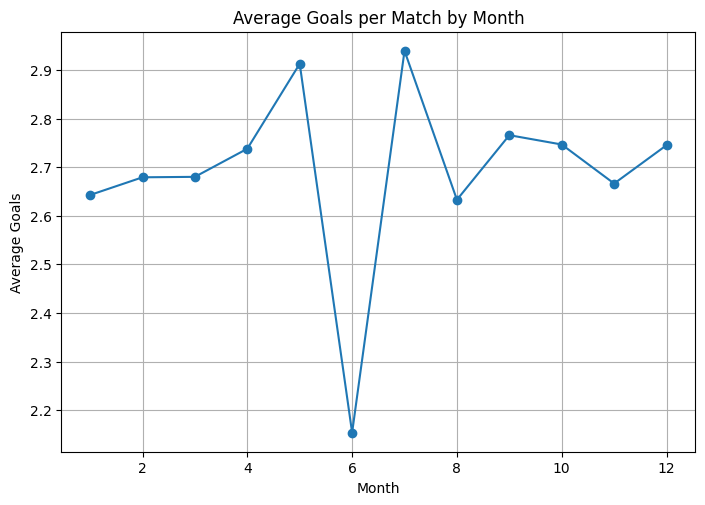

In [14]:
# Plot 1: Monthly Goals
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
monthly_avg_goals.plot(kind='line', marker='o')
plt.title("Average Goals per Match by Month")
plt.xlabel("Month")
plt.ylabel("Average Goals")
plt.grid(True)

**Insights: Monthly Goal Trends**

- This reveals if there are months with notably higher or lower scoring rates. 
- Look for dips during winter months or spikes in early/late season. 
- This can also be in grouping by season-year for clearer signals.

---

# Section 9: Goal Difference
- We'll compute a simple goal difference proxy by subtracting total away goals conceded (based on away goals column) from total home goals. 
- This creates a quick view of net scoring advantage at home.

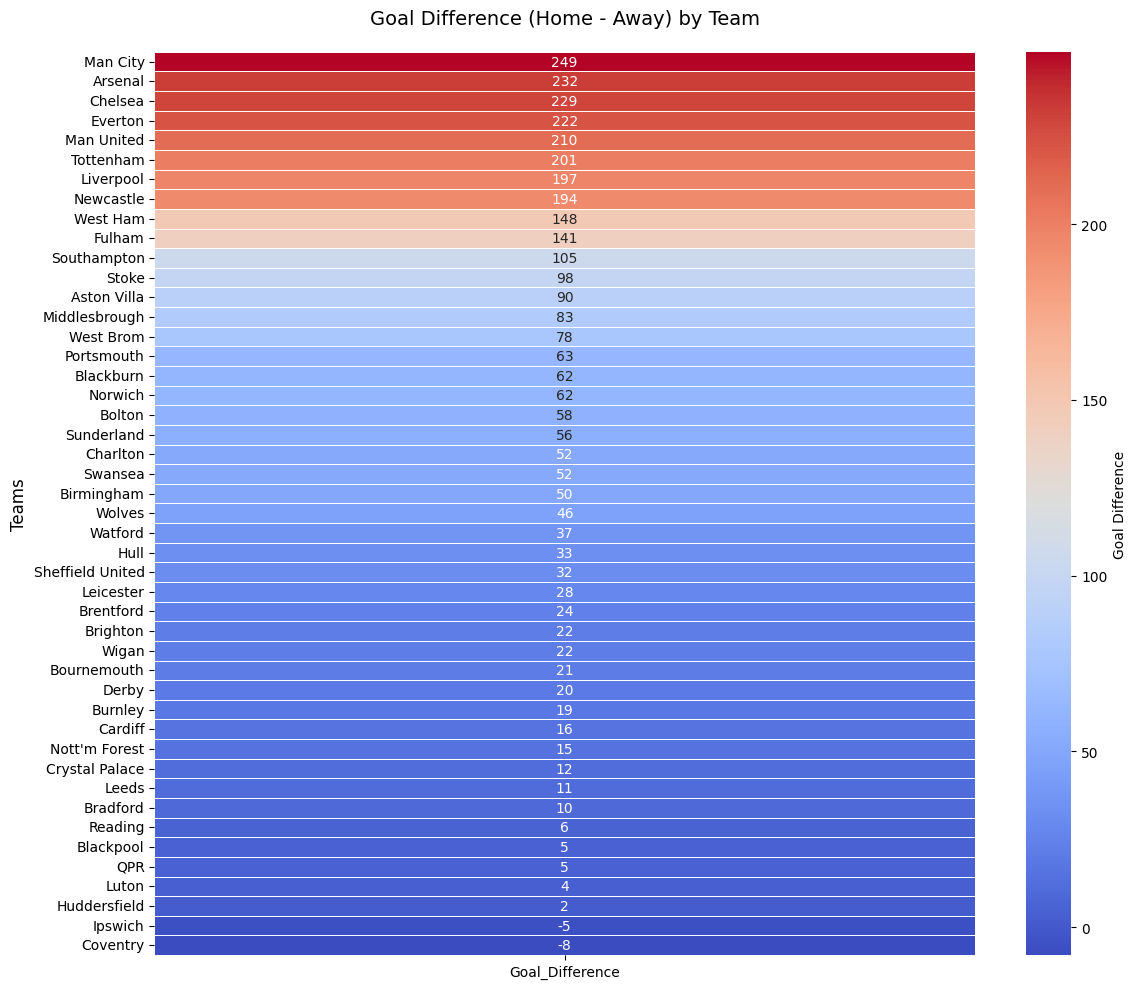

In [15]:
# Plot 2: Heatmap Goal Diff - Improved version
plt.figure(figsize=(12, 10))  # Create a new figure with larger size
sns.heatmap(goal_diff_df.sort_values('Goal_Difference', ascending=False), 
            annot=True, 
            fmt='.0f', 
            cmap="coolwarm",
            cbar_kws={'label': 'Goal Difference'},
            annot_kws={'size': 10},  # Increase annotation font size
            square=False,  # Allow rectangular cells
            linewidths=0.5)  # Add grid lines between cells
plt.title("Goal Difference (Home - Away) by Team", fontsize=14, pad=20)
plt.xlabel("", fontsize=12)
plt.ylabel("Teams", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insights: Goal Difference Heatmap**
- This is a heuristic indicator of which teams get the most from playing at home versus conceding away
- Bear in mind this mixes roles (home/away) and seasons
- For a clearer metric, compute season-by-season or use goals_for and goals_against per team.

---

# Section 10: Match Result Distribution
Let's look at how often home wins, away wins and draws occur. This tells us about how competitive the league is and complements the goal analysis.

- Percentages of match results
- Home win
- Away win
- Draw

Text(0, 0.5, '')

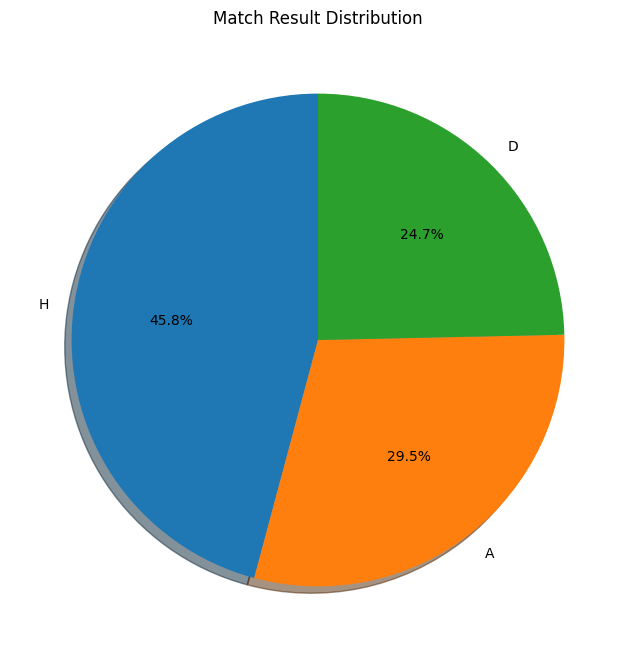

In [16]:
# Plot 3: Pie Chart of Results
plt.figure(figsize=(8, 8))
result_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Match Result Distribution")
plt.ylabel('')

**Insights: Results Breakdown**

Compare the percentage of home wins vs away wins. A strong home advantage would show a sizeable higher percentage of home wins. Draw percentage indicates parity in the league.

- Home wins are at a higher percentage of 45.8%
- Away win are at a percentage of 29.5%
- Draw are at a percentage of 24.7%

---

# Section 11: Points per Match (Team-level)
- We'll convert each match to points for the home team and away team H=3, A=3 and D=1 and compute average points per match for each team. 
- This approximates long-run strength.

In [17]:
# Plot 4: First, make sure these variables are defined by running the prerequisite cells:

# Result distribution
result_counts = df['FullTimeResult'].value_counts()

# Points per match calculation
def assign_points(row):
    if row['FullTimeResult'] == 'H':
        return {row['HomeTeam']: 3, row['AwayTeam']: 0}
    elif row['FullTimeResult'] == 'A':
        return {row['HomeTeam']: 0, row['AwayTeam']: 3}
    else:
        return {row['HomeTeam']: 1, row['AwayTeam']: 1}

points_dict = {}
for _, row in df.iterrows():
    pts = assign_points(row)
    for team, p in pts.items():
        points_dict[team] = points_dict.get(team, []) + [p]

points_per_match = {team: sum(pts)/len(pts) for team, pts in points_dict.items()}
points_series = pd.Series(points_per_match).sort_values(ascending=False)

# Now the Plotly visualization will work:
import plotly.express as px
import plotly.graph_objects as go

# Convert to Plotly bar chart
fig = go.Figure(data=[
    go.Bar(
        x=points_series.index,
        y=points_series.values,
        marker_color='skyblue',
        marker_line_color='darkblue',
        marker_line_width=1
    )
])

fig.update_layout(
    title={
        'text': "Average Points per Match by Team",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title="Teams",
    yaxis_title="Points",
    xaxis={
        'tickangle': 45,
        'tickfont': {'size': 10}
    },
    yaxis={'tickfont': {'size': 12}},
    width=1100,
    height=400,
    margin=dict(b=100),
    showlegend=False
)

fig.show()

**Insights: Average Points per Match**
- Teams with the highest average points are likely stable top-four or top-half teams. 
- This metric is useful to compare across seasons—however be careful when teams have significantly different numbers of matches (e.g., dataset includes partial seasons).

---

# Section 12: xG vs Actual goals 
- (Synthetic xG Generation & xG vs Actual Comparison)
- If the dataset does not contain expected goals (xG), we create a synthetic xG for demonstration only.

In [18]:
# Synthetic xG generation
np.random.seed(42)
if 'Home_xG' not in df.columns:
    df['Home_xG'] = df['FullTimeHomeGoals'] + np.random.normal(0, 0.5, size=len(df))
if 'Away_xG' not in df.columns:
    df['Away_xG'] = df['FullTimeAwayGoals'] + np.random.normal(0, 0.5, size=len(df))

- The goal here is to show how to compare expected vs actual goals visually.

C:\Users\ajayc\AppData\Local\Temp\ipykernel_12580\1790640270.py:23: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.

c:\Projects\english-premier-league-capstone-project\english-premier-league-capstone-project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.



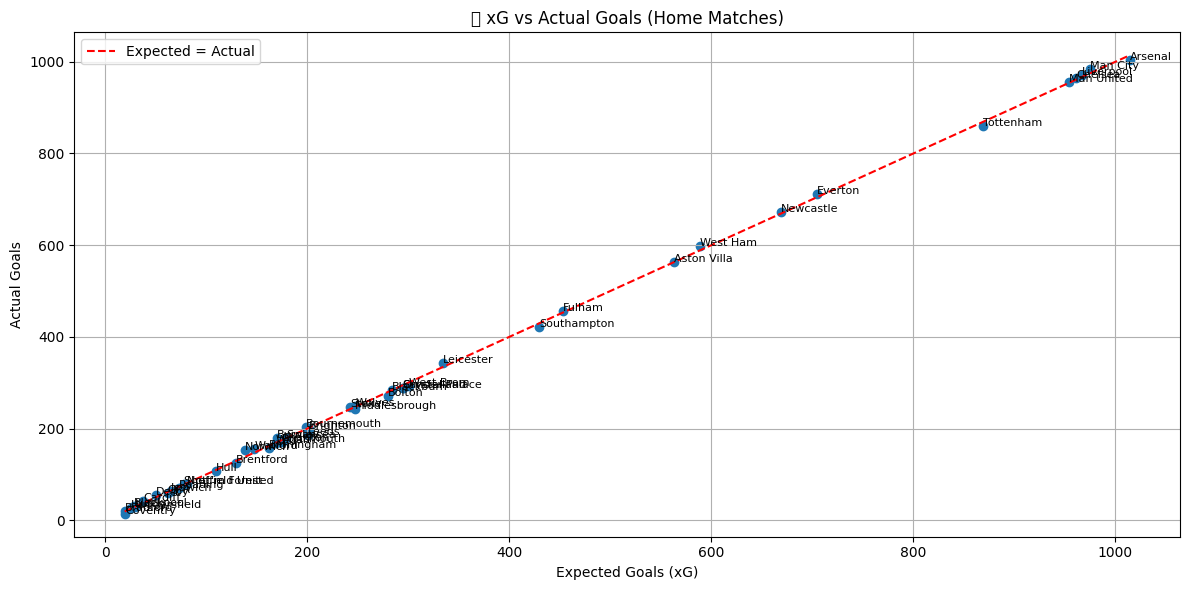

In [27]:
# Plot 5: Create synthetic xG values for demonstration
np.random.seed(42)
df['Home_xG'] = df['FullTimeHomeGoals'] + np.random.normal(0, 0.5, size=len(df))
df['Away_xG'] = df['FullTimeAwayGoals'] + np.random.normal(0, 0.5, size=len(df))

team_xg = df.groupby('HomeTeam')[['FullTimeHomeGoals', 'Home_xG']].sum().rename_axis("Team").reset_index()
team_xg.columns = ['Team', 'ActualGoals', 'ExpectedGoals']

plt.figure(figsize=(12, 6))
plt.scatter(team_xg['ExpectedGoals'], team_xg['ActualGoals'])

for i, row in team_xg.iterrows():
    plt.text(row['ExpectedGoals'], row['ActualGoals'], row['Team'], fontsize=8)

plt.plot([team_xg['ExpectedGoals'].min(), team_xg['ExpectedGoals'].max()],
         [team_xg['ExpectedGoals'].min(), team_xg['ExpectedGoals'].max()],
         'r--', label='Expected = Actual')
plt.xlabel("Expected Goals (xG)")
plt.ylabel("Actual Goals")
plt.title("🎯 xG vs Actual Goals (Home Matches)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Insights: xG vs Actual**
- Points above the dashed line indicate teams that outscored their expected goals (maybe clinical finishers or lucky)
- while points below indicate underperformance relative to xG.

In [23]:
df.head(50)  # Display the first 50 rows of the DataFrame again to confirm changes

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Result,Goal_Diff,Total_Goals,Month,Home_xG,Away_xG
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,1,2,0,0,Home Win,4,4,8,4.248357,-0.001119
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,1,2,0,0,Home Win,2,6,8,3.930868,1.466283
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,5,3,1,0,Away Win,-2,4,8,1.323844,2.370468
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,1,1,0,0,Draw,0,4,8,2.761515,1.497342
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,1,3,0,0,Home Win,2,2,8,1.882923,-0.361584
5,2000/01,2000-08-19,Leicester,Aston Villa,0,0,D,0,0,D,...,2,3,0,0,Draw,0,0,8,-0.117068,0.183303
6,2000/01,2000-08-19,Liverpool,Bradford,1,0,H,0,0,D,...,1,1,0,0,Home Win,1,1,8,1.789606,-0.397859
7,2000/01,2000-08-19,Sunderland,Arsenal,1,0,H,0,0,D,...,3,1,0,1,Home Win,1,1,8,1.383717,0.873245
8,2000/01,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,...,0,0,0,0,Home Win,2,4,8,2.765263,1.513576
9,2000/01,2000-08-20,Man United,Newcastle,2,0,H,1,0,H,...,0,1,0,0,Home Win,2,2,8,2.271280,0.404180


**Insights: New DataFrame columns**
- Here we see the new added columns which will help with the analysis for expected goals.
- Month
- Home xG
- Away xG

---

# Section 13: Total goals by match results
- A simple boxplot to show how total goals vary across match outcomes (home win, away win, draw).

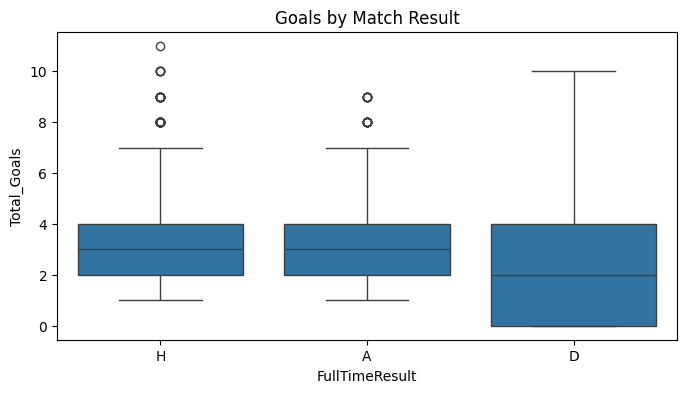

In [20]:
# Boxplot: Goals by Match Result
plt.figure(figsize=(8, 4))
sns.boxplot(x='FullTimeResult', y='Total_Goals', data=df)
plt.title('Goals by Match Result')
plt.show()

**Insights: Goals by Result**
- If draws have a tight distribution around low values, it tells you that draws are often low-scoring. 
- Home and away wins usually show higher median total goals.

---

# Section 14: Clustering by Average goals
We create a simple clustering of teams using average home goals and average away goals to highlight different scoring profiles. This is a toy example intended to inspire richer feature engineering (xG, possession, shots, etc.).

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

team_stats = df.groupby('HomeTeam').agg({
    'FullTimeHomeGoals': 'mean',
    'Home_xG': 'mean',
    'FullTimeAwayGoals': 'mean',
    'Away_xG': 'mean'
}).dropna().reset_index()

scaler = StandardScaler()
scaled_stats = scaler.fit_transform(team_stats[['FullTimeHomeGoals', 'FullTimeAwayGoals']])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
team_stats['Cluster'] = kmeans.fit_predict(scaled_stats)

fig = px.scatter(team_stats, x='FullTimeHomeGoals', y='FullTimeAwayGoals', text='HomeTeam',
                 color='Cluster', title="🧠 Team Clusters by Avg Goals",
                 labels={"FullTimeHomeGoals": "Avg Home Goals", "FullTimeAwayGoals": "Avg Away Goals"})
fig.show()


- Clusters can reveal "high-scoring" teams, "defensive" teams, and balanced teams. 
- Use more features (xG, shots, possession) for richer clustering and interpretation.

---

# Section 15: Summary of the Data Visualisation EPL analysis
The English Premier League (EPL) analysis reveals several key patterns across performance, scoring, and style. Home teams hold a clear advantage, consistently scoring more and winning more frequently. Most matches produce 2–3 goals, with occasional high-scoring outliers, and seasonal trends show slight goal dips in winter months. A few top-scoring teams dominate both home and away fixtures, while goal difference heatmaps highlight the strongest clubs’ home dominance. Points-per-match rankings reveal steady elite performers, contrasted by greater variability in mid-table sides. Cumulative points timelines show momentum swings over a season, and xG vs. actual goals comparisons uncover over- and under-performers, offering scouting insights. Clustering further categorizes teams into high-scoring, defensive, and balanced profiles, providing a clear view of differing playing styles.


---